# Udacity - Introduction to Machine Learning Course
## Submitted by Abhijith Ganesh

<hr/>

### Recommended approach
Using a Convoluted Neural Network and TL based on VGG19 (Weights of Imagenet)

Use torchvision to classify hand written characters and identify them! Classic MNIST

In [1]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
import matplotlib.pyplot as plt
from torchvision.models import  VGG19_Weights, vgg19
from datetime import datetime
from torch.optim import Adam
from torch import nn, save, no_grad, max
import random

batch_size = 16
learning_rate = 10**(-3)
num_epochs = 5

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setting Constants for the experiment

<hr/>

Setting values like batch_size, number of epochs and learning rate

In [2]:
def set_constants(batch_size: int, learning_rate: float, number_of_epochs: int) -> tuple:
    batch_size = batch_size
    learning_rate = learning_rate
    no_of_epochs = number_of_epochs

    return (batch_size, learning_rate, no_of_epochs)

## Transformers and Loaders
<hr/>

### Addition of data and loaders


Change the download boolean to download. You can set the path according to your setup!

```python
image_dataset = MNIST(root=f'{YOUR_PATH_NAME}', train=True, download=True)
```

### Transformers:
I've resized it to 224x224 as VGG19 uses this dimension


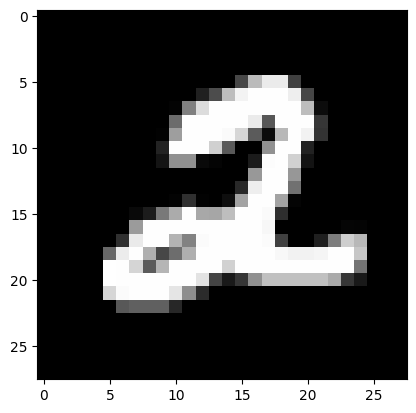

In [3]:
im_show_transformer = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),    
    transforms.ToTensor(),
    transforms.Resize([224, 224]),
    transforms.Normalize(mean=[0.5], std=[0.5]) 
])
image_dataset = MNIST(root='./data', train=True, download=True, transform=im_show_transformer)
split = 0.8

train_len = int(len(image_dataset)*split*0.5)
test_len  = len(image_dataset) - 2*train_len

train_set, valid_set, test_set = random_split(image_dataset, [train_len, train_len, test_len])

plt.imshow(train_set.dataset.data[random.randrange(1, len(train_set))], cmap='gray')

In [4]:
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True)

## Using VGG 19

In [5]:
model = vgg19(weights=VGG19_Weights)
in_features = model.classifier[6].in_features
model.features[0] = nn.Conv2d(
    1, 64, kernel_size = 3, stride=1, padding=1
)
model.classifier[6] = nn.Linear(
    in_features,
    10
)

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [7]:
def set_loss_function():
    return nn.CrossEntropyLoss()

def set_optimizer(params, learning_rate):
    return Adam(params, lr = learning_rate)

In [8]:
optimizer = set_optimizer(model.parameters(), learning_rate)
criterion = set_loss_function()

## Defining the validation function

In [9]:
def validate_model(model, validation_loader) -> int:
    model.eval()

    total: int = 0
    correct: int = 0

    with no_grad():  # Disable gradient calculation during validation
        for images, labels in validation_loader:
            
            outputs = model(images)
            _, predicted = max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            print(correct)

    accuracy = 100 * correct / total
    return accuracy

## Training the model

In [10]:
total_loss = 0

for epochs in range(num_epochs):
    iterations = 0
    model.train()
    
    print(f"Starting with the training process {datetime.now()}")

    for images, labels in train_loader:     
        iterations += 1

        outputs = model(images)
        loss = criterion(outputs, labels)

       
        loss.backward()
        optimizer.step()
       
        optimizer.zero_grad()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epochs+1}/{num_epochs}], Average Loss: {avg_loss} at time {datetime.now()}")

    with no_grad():
        accuracy = validate_model(model, valid_loader)
        print(f"At Epoch [{epochs+1}/{num_epochs}], Accuracy is {accuracy}")

Starting with the training process 2023-05-23 17:33:22.304562


## Add fields to store important values


As a ML engineer, I'd prefer storing the data of the following :
- Model (Obviously)
- Optimizer
- Batch Size
- Loss Criterion

In [ ]:
def generate_custom_dict(model, optimizer, loss_criterion, batch_size = batch_size) -> dict:
    custom_dictionary = {
        "model": model.state_dict(),
        "optimizer": optimizer.state_dict(),
        "loss": loss_criterion,
        "hyperparameters": {
            "batch_size":batch_size
        }
    }
    return custom_dictionary

custom_dict = generate_custom_dict(model, optimizer, criterion)

## Saving the file to VGG binary

<hr/>

```python
def save_model(path:str):
    torch.save(model.state_dict(), path)
```

In [ ]:
def save_model(custom_dict:dict, path:str):
    save(custom_dict, path)

In [ ]:
save_model(custom_dict, f'vgg-19-{datetime.now().strftime(f"%d_%m_%y_____%H_%M_%S")}.pth')